## Black-Scholes formula

计算欧式期权理论价格的数学模型。

在无套利原则下，为期权这类衍生品定价的解析方法。

通过构建一个由标的资产和无风险债券组成的、能够完全复制期权 payoff 的投资组合，从而确定期权的“公平”价格。

---

### 模型核心假设 | Model Core Assumptions

1. 市场有效性：市场是无摩擦的，没有交易成本、税费。
2. 无风险利率恒定：存在一个已知的、恒定的无风险利率 $r$，投资者可以以此利率自由借贷。
3. 标的资产价格行为：标的资产（如股票）的价格 $S_t$ 遵循几何布朗运动：
    - $\mu$：资产的预期收益率（常数）。
    - $\sigma$：资产收益率的波动率（常数）。
    - $W_t$：标准布朗运动（维纳过程），代表随机冲击。
4. 不支付股息：在期权有效期内，标的资产不支付股息。
5. 欧式期权：期权只能在到期日 $T$ 行权。
6. 不允许卖空限制：允许完全卖空资产，并能立即使用全部卖空所得。
7. 连续交易：市场允许连续交易。

---

精髓：Delta对冲，构建一个无风险的投资组合。

---

#### European Call Option

$$
C(S,t) = S_0\mathcal{N}(d_1) - Ke^{-rT}\mathcal{N}(d_2)
$$

#### European Put Option

$$
P(S,t) = Ke^{-rT}\mathcal{N}(-d_2) - S_0\mathcal{N}(-d_1)
$$

- $C$：看涨期权理论价格
- $P$：看跌期权理论价格
- $S_0$：标的资产的当前价格
- $K$：期权的行权价
- $T$：期权的剩余期限（以年为单位）
- $r$：无风险年利率
- $\sigma$：标的资产年化波动率
- $\mathcal{N}(x)$：标准正态分布的累积分布函数

$$
d_1 = \frac{\ln(\frac{S_0}{K}) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}} \\
d_2 = d_1 - \sigma\sqrt{T} = \frac{\ln(\frac{S_0}{K}) + (r - \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}
$$




In [1]:
from codecs import ignore_errors
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
N = norm.cdf

In [3]:
def BS_CALL(S0, K, T, r, sigma):
    
    d1 = (np.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    
    d2 = d1 - sigma * np.sqrt(T)

    return S0 * N(d1) - K * np.exp(-r * T) * N(d2)

def BS_PUT(S0, K, T, r, sigma):

    d1 = (np.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))

    d2 = d1 - sigma ** np.sqrt(T)

    return K * np.exp(-r * T) * N(-d2) - S0 * N(-d1)


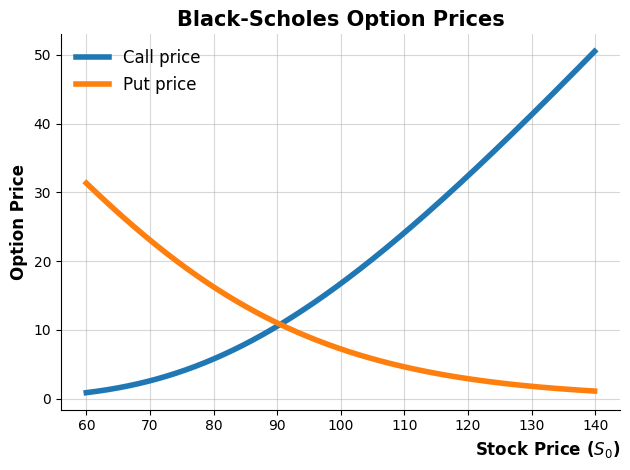

In [4]:
K, r, T, sigma = 100, 0.1, 1, 0.3
S0 = np.arange(60, 140, 0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S0]
puts = [BS_PUT(s, K, T, r, sigma) for s in S0]

fig, ax = plt.subplots(1)
ax.plot(S0, calls, linewidth = 4, label = "Call price")
ax.plot(S0, puts, linewidth = 4, label = "Put price")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(loc = "upper left", fontsize = 12, frameon = False)
ax.set_title(
    "Black-Scholes Option Prices",
    fontsize = 15,
    fontweight = "bold",
    fontfamily = "sans-serif"
)
ax.set_xlabel(
    "Stock Price ($S_0$)",
    loc = "right",
    fontsize = 12,
    fontweight = "bold"
)
ax.set_ylabel(
    "Option Price",
    fontsize = 12,
    fontweight = "bold"
)
ax.grid(True, alpha = 0.5)
plt.tight_layout()
plt.show()


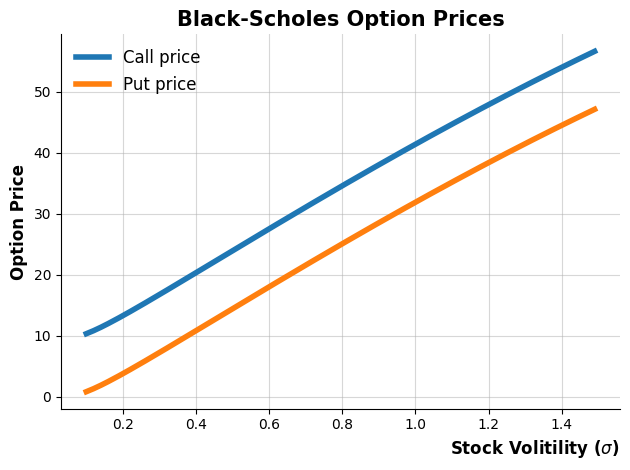

In [5]:
S0, K, r, T = 100, 100, 0.1, 1
vols = np.arange(0.1, 1.5, 0.01)
calls = [BS_CALL(S0, K, T, r, sig) for sig in vols]
puts = [BS_PUT(S0, K, T, r, sig) for sig in vols]

fig, ax = plt.subplots(1)
ax.plot(vols, calls, linewidth = 4, label = "Call price")
ax.plot(vols, puts, linewidth = 4, label = "Put price")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(loc = "upper left", fontsize = 12, frameon = False)
ax.set_title(
    "Black-Scholes Option Prices",
    fontsize = 15,
    fontweight = "bold",
    fontfamily = "sans-serif"
)
ax.set_xlabel(
    "Stock Volitility ($\sigma$)",
    loc = "right",
    fontsize = 12,
    fontweight = "bold"
)
ax.set_ylabel(
    "Option Price",
    fontsize = 12,
    fontweight = "bold"
)
ax.grid(True, alpha = 0.5)
plt.tight_layout()
plt.show()


---

## Vectorization: Speeding-up computations

In [6]:
from time import time

In [7]:
S0 = np.linspace(20, 180, 1_000_000)

In [9]:
startTime = time()
calls = [BS_CALL(s, K, T, r, sigma) for s in S0]
print(f"Execution time in seconds: {str(time() - startTime)}")


Execution time in seconds: 59.52786946296692


In [10]:
startTime = time()
calls = BS_CALL(S0, K, T, r, sigma)
print(f"Execution time in seconds: {str(time() - startTime)}")


Execution time in seconds: 0.1333160400390625
